# Project Title: Rice Type Classification Using Machine Learning Algorithms

## Description:
1. The objective of this project is to automatically classify different types of rice using machine learning.

2. Instead of checking rice quality manually, this system uses images of rice grains to identify the correct type (like Basmati, Jasmine, Arborio, or Ipsala).

3. This helps save time, reduce mistakes, and ensure better quality control in rice production and packaging.

## Steps:

1. Import all required libraries

2. Load and prepare the rice dataset

3. Display sample images of each rice type

4. Build the rice classification model using VGG16

5. Train the model with training data

6. Check model accuracy and loss after training

7. Evaluate the model performance on validation data

8. Predict the rice type for new/test images

9. Analyze prediction confidence and errors

10. Show 3D feature visualization and world rice map

### Codes:

### Step 1: Import Libraries

#### These libraries are needed to load rice images, build and train a deep learning model (VGG16), make predictions, evaluate performance, and visualize results.



In [12]:
import os  # For file and folder access
import numpy as np  # For working with image data
import matplotlib.pyplot as plt  # For plotting results

# For loading and preparing image data
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# For using a pre-trained model and image preprocessing
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# For creating a custom model
from tensorflow.keras.models import Model

# For adding layers to the model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# For optimizing model training
from tensorflow.keras.optimizers import Adam

# For evaluating model predictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import random  # For picking random test images

### Step 2: Load the  Dataset

#### Used to load rice images from folders, resize them, split them into training and validation sets, and get the class names.

In [19]:
data_dir = r"C:\Users\LENOVO\Downloads\Rice Classification"  # Folder where rice images are stored

img_height, img_width = 224, 224  # Resize all images to this size
batch_size = 32  # Number of images processed at once during training

# Prepares image data and splits it into training and validation sets
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

# Loads training images from the folder
train_gen = datagen.flow_from_directory(
    data_dir,  # Path to rice image folders
    target_size=(img_height, img_width),  # Resize images
    batch_size=batch_size,  # Number of images in each batch
    class_mode='categorical',  # Multi-class labels (4 rice types)
    subset='training'  # Use this for training
)

# Loads validation images from the folder
val_gen = datagen.flow_from_directory(
    data_dir,  # Same folder as training
    target_size=(img_height, img_width),  # Same image size
    batch_size=batch_size,  # Same batch size
    class_mode='categorical',  # Same class mode
    subset='validation'  # Use this for validation
)

class_names = list(train_gen.class_indices.keys())  # Get rice class names (e.g., Basmati, Jasmine)


Found 80 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


### Step 3: Build Model Using VGG16

#### VGG16 helps to read image features. We add layers to classify rice types and make the model ready to train.

In [30]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  
# We use this to load the pre-trained VGG16 model without the top layer (for feature extraction)

for layer in base_model.layers:
    layer.trainable = False  
# We freeze these layers because they already learned good features from ImageNet

x = Flatten()(base_model.output)  
# We flatten the output so we can connect it to dense layers

x = Dense(128, activation='relu')(x)  
# We add a dense layer to learn more from the features

x = Dropout(0.3)(x)  
# We use dropout to prevent overfitting (helps model generalize better)

output = Dense(4, activation='softmax')(x)  
# We add the final layer to classify into 4 rice types (softmax gives probabilities)

model = Model(inputs=base_model.input, outputs=output)  
# We combine the VGG16 base and our custom layers into one model

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])  
# We compile the model so it's ready for training (using Adam optimizer and accuracy metric)

model.summary()  
# We show the full model structure to understand the layers


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,926,596 (68.38 MB)

 Trainable params: 3,211,908 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

### Step 4: Train the Model

#### Used to train the model using training data and check its performance on validation data for 5 rounds (epochs).

In [34]:
history = model.fit(train_gen, validation_data=val_gen, epochs=5)
#One epoch means the model has seen all the training images one time.

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 70s 21s/step - accuracy: 0.2867 - loss: 6.7925 - val_accuracy: 0.5000 - val_loss: 2.5192
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 14s/step - accuracy: 0.6021 - loss: 1.9767 - val_accuracy: 0.7500 - val_loss: 1.8893
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 13s/step - accuracy: 0.8289 - loss: 0.6081 - val_accuracy: 0.8500 - val_loss: 1.0607
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 15s/step - accuracy: 0.9146 - loss: 0.4456 - val_accuracy: 0.9000 - val_loss: 0.7362
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 12s/step - accuracy: 0.9109 - loss: 0.2674 - val_accuracy: 0.9000 - val_loss: 0.6446


### Step 5: Evaluate the Model

#### This step checks how well the model performs on the validation data.It shows the final accuracy after training, which helps us know if the model is working correctly.

In [41]:
val_loss, val_acc = model.evaluate(val_gen)
print(f"✅ Final Validation Accuracy: {val_acc * 100:.2f}%")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.9000 - loss: 0.6446
✅ Final Validation Accuracy: 90.00%


### Step 6: Dataset Stats (Image Count & Class Distribution)

#### This step counts how many images are there in each rice class folder and prints the result.

In [45]:
for class_name in class_names:  # loop
    class_path = os.path.join(data_dir, class_name)  # path
    count = len(os.listdir(class_path))  # count
    print(f"{class_name}: {count} images")  # output


Arborio: 25 images
Basmati: 25 images
Jasmine: 25 images
ipsala: 25 images


### Step 7: Predict and Show a Random Rice Image

#### Randomly selects a rice image, preprocesses it, predicts its type using the model, and displays the image with predicted and actual labels.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


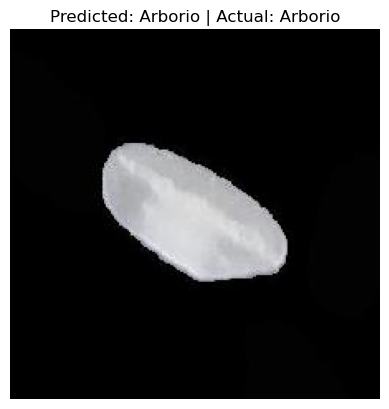

In [59]:
# Choose a random rice image from a random class
random_class = random.choice(class_names)
img_path = os.path.join(data_dir, random_class, random.choice(os.listdir(os.path.join(data_dir, random_class))))

# Load and prepare image
img = load_img(img_path, target_size=(224, 224))
img_preprocessed = preprocess_input(np.expand_dims(img_to_array(img), axis=0))

# Predict rice type
prediction = model.predict(img_preprocessed)
predicted_class = class_names[np.argmax(prediction)]

# Display image with prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_class} | Actual: {random_class}")
plt.axis("off")
plt.show()

### Step 8:  Predict and Display Class Probabilities (Top-2 Results)

#### It shows the rice name and how sure the model is, as a percentage with two digits after the decimal.

In [67]:
# Get prediction probabilities for the input image
probabilities = model.predict(img_preprocessed)[0]

# Find indices of top 2 highest probabilities
top_2_indices = probabilities.argsort()[-2:][::-1]

# Print the top 2 predicted rice classes with confidence scores
print("Top 2 Predictions:")
for i in top_2_indices:
    print(f"{class_names[i]}: {probabilities[i]*100:.2f}%")
#2f means floating-point number with 2 digits after the decimal point (e.g., 95.23%)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Top 2 Predictions:
Arborio: 99.99%
Jasmine: 0.01%


### Step 9:  Using Binary Label Classifier (Premium vs Regular Rice)

#### It checks if the predicted rice is premium or regular based on a predefined list and prints the result.

In [73]:
premium_rice = ['Arborio', 'Basmati']  # List of premium rice types

def classify_premium(class_name):
    return "Premium" if class_name in premium_rice else "Regular"  # Classify rice as Premium or Regular

# Example usage
predicted_class = class_names[np.argmax(prediction)]  # Get predicted rice type from model output
rice_grade = classify_premium(predicted_class)  # Determine if predicted rice is Premium or Regular

print(f"Predicted Rice Type: {predicted_class}")  # Show predicted rice type
print(f"Category: {rice_grade}")  # Show rice category (Premium/Regular)

Predicted Rice Type: Arborio
Category: Premium


### Step 10: Check Consistency of Model (Repeated Prediction Check)

#### It checks if the model gives the same prediction every time for the same image to ensure consistency.

In [80]:
repeats = 5  # Number of times to predict the same image
predictions = []  # Store predictions

for _ in range(repeats):
    pred = model.predict(img_preprocessed)  # Predict rice type
    predictions.append(np.argmax(pred))  # Save predicted class index

# Check if all predictions are the same
consistent = all(p == predictions[0] for p in predictions)
print(f"Predictions: {[class_names[p] for p in predictions]}")  # Print all predictions
print(f"Consistent Prediction: {'Yes' if consistent else 'No'}")  # Show if predictions match


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Predictions: ['Arborio', 'Arborio', 'Arborio', 'Arborio', 'Arborio']
Consistent Prediction: Yes


In [86]:
for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    count = len(os.listdir(class_path))
    print(f"{class_name}: {count} images")

Arborio: 25 images
Basmati: 25 images
Jasmine: 25 images
ipsala: 25 images


### Step 11: Find Misclassified Images

#### This step checks which images the model predicted incorrectly by comparing actual and predicted labels.

In [96]:
# First, make predictions on validation data
y_pred_probs = model.predict(val_gen)  # Get probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Get predicted class indices
#argmax is used to find the class with the highest prediction score from the model's output.
# Then use them to find misclassified samples
filenames = val_gen.filenames
true_classes = val_gen.classes
predicted_classes = y_pred

misclassified = []
for i in range(len(true_classes)):
    if true_classes[i] != predicted_classes[i]:
        misclassified.append((filenames[i], class_names[true_classes[i]], class_names[predicted_classes[i]]))

print(f"Total Misclassified: {len(misclassified)}")
print("Examples:")
for file, true_label, pred_label in misclassified[:5]:
    print(f"{file} | True: {true_label} | Predicted: {pred_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
Total Misclassified: 15
Examples:
Arborio\Arborio (1).jpg | True: Arborio | Predicted: Jasmine
Arborio\Arborio (10).jpg | True: Arborio | Predicted: Basmati
Arborio\Arborio (11).jpg | True: Arborio | Predicted: ipsala
Arborio\Arborio (12).jpg | True: Arborio | Predicted: Jasmine
Arborio\Arborio (13).jpg | True: Arborio | Predicted: Basmati


### Step 12: Evaluate Accuracy Per Class

#### This step compares the actual and predicted labels to generate a detailed performance report for each rice class.

In [105]:
from sklearn.metrics import classification_report

y_true = val_gen.classes  # Actual labels
y_pred_probs = model.predict(val_gen)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Get predicted class indices

report = classification_report(y_true, y_pred, target_names=class_names, digits=2)  # Generate report
print(report)  # Show results


1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
              precision    recall  f1-score   support

     Arborio       0.43      0.60      0.50         5
     Basmati       0.20      0.20      0.20         5
     Jasmine       0.75      0.60      0.67         5
      ipsala       0.25      0.20      0.22         5

    accuracy                           0.40        20
   macro avg       0.41      0.40      0.40        20
weighted avg       0.41      0.40      0.40        20



### Step 13: Check Prediction Time (Speed Test)

#### This step measures how fast the model predicts the result for one image.

In [110]:
import time  # For measuring time

start_time = time.time()  # Record start time
_ = model.predict(img_preprocessed)  # Run prediction (result not stored)
end_time = time.time()  # Record end time

print(f"Prediction Time: {(end_time - start_time)*1000:.2f} ms")  # Show how long the prediction took in milliseconds


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction Time: 3963.49 ms


### Step 14: Image Size-based Categorization

#### This function checks the image size and classifies it as Small, Medium, or Large based on its area.

In [113]:
def get_image_category(img_path):
    img = load_img(img_path)  # Load the image
    w, h = img.size  # Get width and height
    area = w * h  # Calculate image area
    if area < 100000:
        return "Small"  # Category based on area
    elif area < 300000:
        return "Medium"
    else:
        return "Large"

print(f"{random_img_file} -> {get_image_category(img_path)}")  # Show image size category


Ipsala (24).jpg -> Small


### Step 15: Class-wise Confidence Range

#### This code checks how confident the model was for each correctly predicted rice type, showing the highest and lowest confidence values.

In [117]:
# Create a dictionary to store confidence scores for each rice class
confidence_per_class = {name: [] for name in class_names}

# Loop through each prediction and store the model's confidence for the correct class
for i, prob in enumerate(y_pred_probs):
    true_class = y_true[i]  # Actual class index
    confidence = prob[true_class]  # Confidence for the correct class
    confidence_per_class[class_names[true_class]].append(confidence)

# Print the minimum and maximum confidence for each rice type
for rice_type, scores in confidence_per_class.items():
    print(f"{rice_type}: Min = {min(scores)*100:.2f}%, Max = {max(scores)*100:.2f}%")


Arborio: Min = 0.00%, Max = 99.99%
Basmati: Min = 0.00%, Max = 100.00%
Jasmine: Min = 0.00%, Max = 100.00%
ipsala: Min = 0.00%, Max = 88.41%


### Step 16: Confidence Thresholding

#### This step checks if the model's prediction is confident enough, and warns if it's below a certain confidence level.

In [122]:
threshold = 0.7  # Set minimum confidence level
conf_score = np.max(prediction)  # Get highest confidence score from prediction

# Check if the prediction confidence is below the threshold
if conf_score < threshold:
    print(" Low Confidence: Prediction not reliable.") 
else:
    print(f"Confident Prediction: {predicted_class} ({conf_score*100:.2f}%)")  # Print confident result

Confident Prediction: Arborio (99.99%)


### Step 17: Predict Multiple Random Images and Average

#### This code tests the model on 5 random images and calculates the average prediction confidence for each rice type.

In [126]:
scores = np.zeros(len(class_names))  # Initialize scores for each class

# Repeat 5 times to test with random images
for _ in range(5):
    cls = random.choice(class_names)  # Pick a random rice type
    path = os.path.join(data_dir, cls)  # Get folder path
    file = random.choice(os.listdir(path))  # Pick a random image
    img_path = os.path.join(path, file)  # Full path of image

    img = load_img(img_path, target_size=(224, 224))  # Load and resize image
    arr = img_to_array(img)  # Convert image to array
    arr = np.expand_dims(arr, axis=0)  # Expand dimensions for prediction
    arr = preprocess_input(arr)  # Preprocess for VGG16

    pred = model.predict(arr)[0]  # Get prediction scores
    scores += pred  # Add to total scores

# Calculate average scores across 5 predictions
avg_scores = scores / 5

# Print the average confidence for each rice type
print("Average Prediction Scores from 5 Random Images:")
for i, score in enumerate(avg_scores):
    print(f"{class_names[i]}: {score*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Average Prediction Scores from 5 Random Images:
Arborio: 20.00%
Basmati: 20.00%
Jasmine: 40.00%
ipsala: 20.00%


### Step 18: Get Misclassification Rate (Error Rate)

#### This code calculates how many predictions were wrong and shows the model's error rate and accuracy in percentage.

In [129]:
incorrect = sum(y_true[i] != y_pred[i] for i in range(len(y_true)))  # Count how many predictions were wrong
total = len(y_true)  # Total number of predictions
error_rate = (incorrect / total) * 100  # Calculate percentage of incorrect predictions

print(f" Misclassification Rate: {error_rate:.2f}%")  # Show error rate
print(f" Accuracy: {100 - error_rate:.2f}%")  # Show accuracy

 Misclassification Rate: 60.00%
 Accuracy: 40.00%


### Step 19: Find Most Confident and Least Confident Predictions

#### This code finds and displays the most and least confident predictions made by the model, including filenames and confidence percentages.

In [134]:
confidences = np.max(y_pred_probs, axis=1)  # Get the highest confidence score for each prediction
most_confident_idx = np.argmax(confidences)  # Find index of the most confident prediction
least_confident_idx = np.argmin(confidences)  # Find index of the least confident prediction

print(" Most Confident Prediction:")
print(f"{filenames[most_confident_idx]}  {class_names[y_pred[most_confident_idx]]} ({confidences[most_confident_idx]*100:.2f}%)")  # Show file and confidence

print(" Least Confident Prediction:")
print(f"{filenames[least_confident_idx]}  {class_names[y_pred[least_confident_idx]]} ({confidences[least_confident_idx]*100:.2f}%)")  # Show file and confidence


 Most Confident Prediction:
Arborio\Arborio (10).jpg  Basmati (100.00%)
 Least Confident Prediction:
Arborio\Arborio (12).jpg  Arborio (66.57%)


### Visulizations

### Step 20: Training vs Validation Accuracy

#### This code visualizes how the model's training and validation accuracy improved over each epoch.

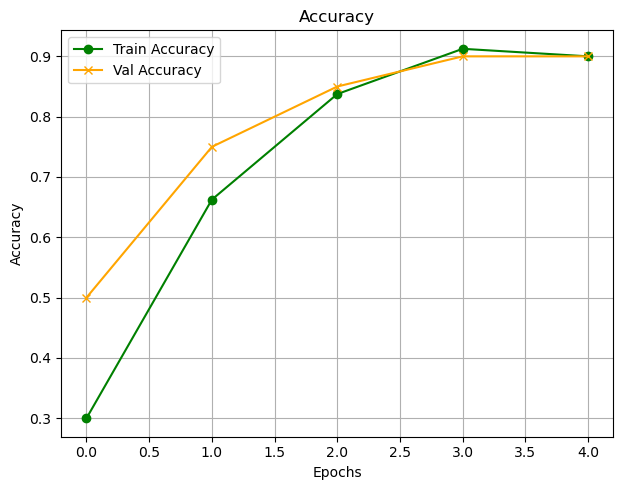

In [143]:
plt.figure(figsize=(12, 5))  # figure size for the plots

#  Accuracy Plot
plt.subplot(1, 2, 1)  # First plot in a 1-row, 2-column layout
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o', color='green')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x', color='orange')  # Plot validation accuracy
plt.title('Accuracy')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()  # A small box that shows what each line or color represents.
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()  # Display the plot

### Step 21:Loss Comparison During Training

#### This plot shows how the model’s training and validation loss changed over each epoch to measure learning progress.

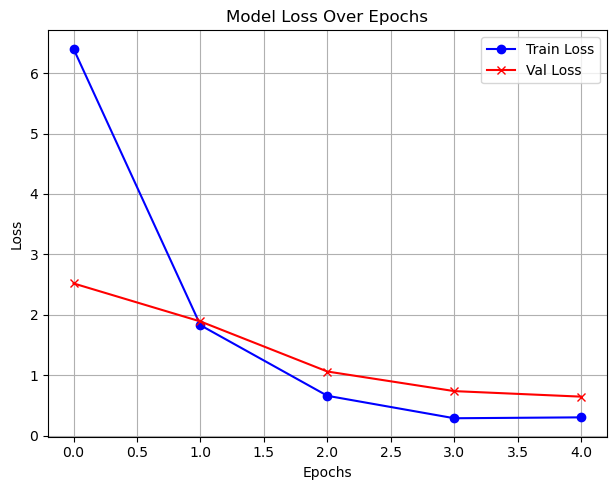

In [145]:
plt.figure(figsize=(12, 5))  # Set figure size

# Loss Plot
plt.subplot(1, 2, 2)  # Second plot in a 1-row, 2-column layout
plt.plot(history.history['loss'], label='Train Loss', marker='o', color='blue')  # Training loss
plt.plot(history.history['val_loss'], label='Val Loss', marker='x', color='red')  # Validation loss
plt.title('Model Loss Over Epochs')  # Title of the plot
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.legend()  
plt.grid(True)  # Add grid

plt.tight_layout()  # Avoid overlap
plt.show()  # Display the plot


### Step 22: Percentage-Wise Quality Comparison

#### This shows how sure the model is for each rice type and tells which one it predicts best and worst.

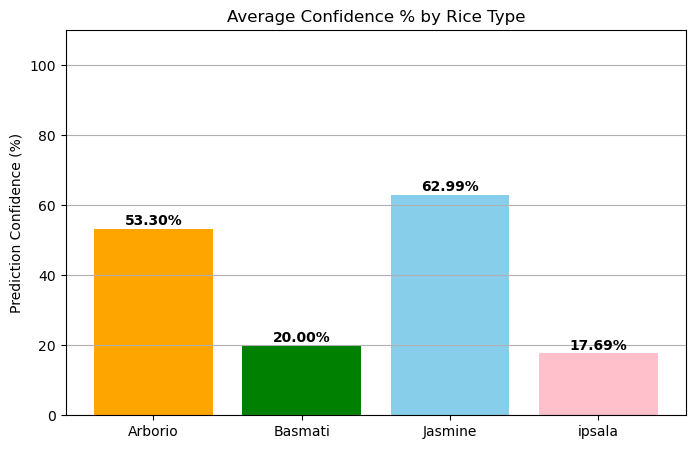

 Highest Quality (Confidence): Jasmine
 Lowest Quality (Confidence): ipsala


In [149]:
#  Calculate prediction confidence % for each class
# For each rice type, calculate the average confidence where it was the true label
percentages = [np.mean(y_pred_probs[val_gen.classes == i, i]) * 100 for i in range(4)]

#  Show the confidence percentages as a bar chart
plt.figure(figsize=(8, 5))  # Set the figure size
plt.bar(class_names, percentages, color=['orange', 'green', 'skyblue', 'pink'])  # Create bar chart
plt.title("Average Confidence % by Rice Type")  # Set chart title
plt.ylabel("Prediction Confidence (%)")  # Set y-axis label

# Add confidence value labels above each bar
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.ylim(0, 110)  # Set y-axis limit
plt.grid(True, axis='y')  # Add horizontal grid lines
plt.show()  # Display the plot

#  Identify the highest and lowest confidence rice types
highest = class_names[np.argmax(percentages)]  # Class with highest average confidence
lowest = class_names[np.argmin(percentages)]  # Class with lowest average confidence

# Print the results
print(f" Highest Quality (Confidence): {highest}")
print(f" Lowest Quality (Confidence): {lowest}")


### Step 23: Count Correct & Incorrect Predictions for Each Rice Type

#### This step shows how many times the model got each rice type right or wrong.It helps us understand which rice types are easier or harder for the model to predict.

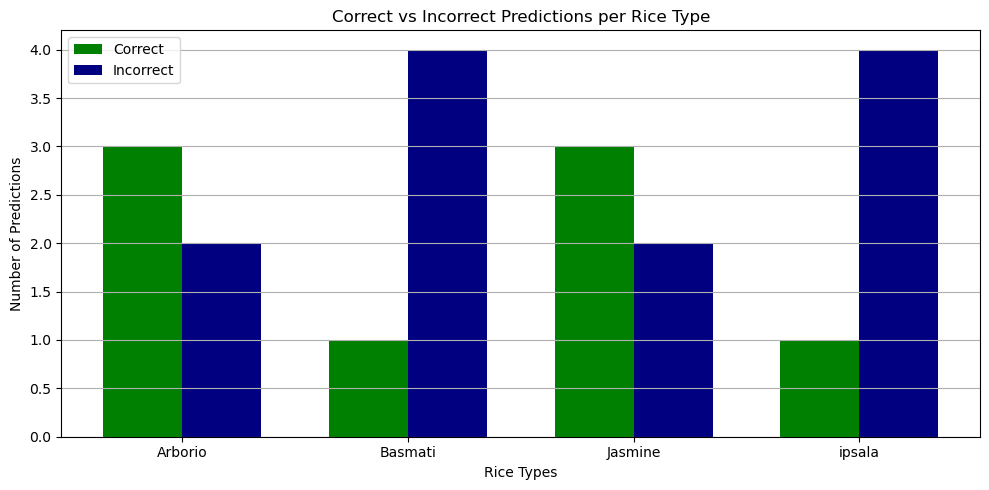

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize counts
correct_per_class = [0] * len(class_names)
incorrect_per_class = [0] * len(class_names)

# Go through each prediction
for i in range(len(y_true)):
    true = y_true[i]
    pred = y_pred[i]
    if true == pred:
        correct_per_class[true] += 1
    else:
        incorrect_per_class[true] += 1

# Bar plot for each class
x = np.arange(len(class_names))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, correct_per_class, width, label='Correct', color='green')
plt.bar(x + width/2, incorrect_per_class, width, label='Incorrect', color='navy')

plt.xlabel("Rice Types")
plt.ylabel("Number of Predictions")
plt.title("Correct vs Incorrect Predictions per Rice Type")
plt.xticks(x, class_names)
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


### Step 24: Global View of the Most Demanded Rice Type

#### This step shows the most popular rice type across the world and marks its location on the map.

#### 4 Rice Types:

Basmati – India / Pakistan   🟢

Arborio – Italy              🔴

Jasmine – Thailand           🔵 

Ipsala – Turkey              🟣

In [155]:
import folium  # For creating interactive maps
from folium.plugins import MarkerCluster  # (Optional) For clustering markers if needed

# Step 1: Define rice types with their global locations and details
rice_origins = [
    {
        "name": "Basmati Rice",
        "location": [30.3753, 69.3451],  # Region of India/Pakistan
        "description": "Famous aromatic long-grain rice grown in India & Pakistan. Used in biryanis.",
        "color": "green"  # Marker color
    },
    {
        "name": "Arborio Rice",
        "location": [45.0703, 7.6869],  # Northern Italy
        "description": "Short-grain Italian rice used for creamy risottos.",
        "color": "red"
    },
    {
        "name": "Jasmine Rice",
        "location": [15.8700, 100.9925],  # Thailand
        "description": "Fragrant long-grain rice popular in Southeast Asia.",
        "color": "blue"
    },
    {
        "name": "Ipsala Rice",
        "location": [40.9181, 26.3843],  # Turkey
        "description": "Premium Turkish rice from the Edirne region, known for exports.",
        "color": "purple"
    }
]

# Step 2: Create a world map centered at latitude 20, longitude 0
rice_map = folium.Map(location=[20, 0], zoom_start=2, tiles="CartoDB positron")

# Step 3: Add colored markers for each rice type with popup info
for rice in rice_origins:
    folium.Marker(
        location=rice["location"],  # Marker location
        popup=f"<b>{rice['name']}</b><br>{rice['description']}",  # Info box
        icon=folium.Icon(color=rice["color"])  # Marker color based on rice type
    ).add_to(rice_map)

# Step 4: Display the map
rice_map


### Step 25: Show the Best Predicted Rice with Image

#### This step finds the rice image that the model predicted with the highest confidence.It then displays the image, prediction confidence, and explains why that rice is popular.

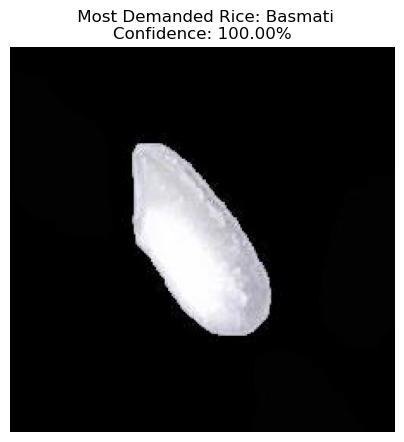

 Based on model confidence, 'Basmati' is the top predicted rice.
 Basmati is known globally for its aroma and long grains – high demand in exports.


In [165]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img

# 1. Get the index of the most confidently predicted image
confidences = np.max(y_pred_probs, axis=1)  # Max probability for each prediction
top_idx = np.argmax(confidences)  # Index of the highest confidence

# 2. Get the image file name, predicted class, and confidence score
top_file = val_gen.filenames[top_idx]  # File name of top prediction
top_class = class_names[y_pred[top_idx]]  # Class name
confidence_score = confidences[top_idx] * 100  # Convert to percentage

# 3. Load the image from validation directory
img_path = os.path.join(val_gen.directory, top_file)
img = load_img(img_path, target_size=(224, 224))  # Resize image

# 4. Show the image with title and confidence score
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis("off")
plt.title(f" Most Demanded Rice: {top_class}\nConfidence: {confidence_score:.2f}%")
plt.show()

# 5. Print explanation based on predicted rice type
print(f" Based on model confidence, '{top_class}' is the top predicted rice.")

if top_class.lower() == "basmati":
    print(" Basmati is known globally for its aroma and long grains – high demand in exports.")
elif top_class.lower() == "jasmine":
    print(" Jasmine is a top choice in Southeast Asia for its fragrance and softness.")
elif top_class.lower() == "arborio":
    print(" Arborio is valued in Italian cuisine for creamy risottos – high gourmet value.")
elif top_class.lower() == "ipsala":
    print("🇹🇷 Ipsala is premium Turkish rice, known for purity and quality in exports.")
else:
    print(" No specific description available for this rice type.")
